## Association subtypes language (Story Vs Math)

In [1]:
import seaborn as sns
import os
import numpy as np
from scipy import stats, integrate
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set(color_codes=True)

In [3]:
path_root = "/home/yassinebha/Drive/HCP"
data_path = os.path.join(path_root,"subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_22-Feb-2017/associations/")

In [5]:
# Load pheno-subtype file
# Math
data_math = pd.read_csv(os.path.join(data_path,'story_pheno_subtype.csv'))
data_math_clean = data_math.dropna() # remove nan's
data_math_clean.head()

,ID,sub1,sub2,sub3,sub4,sub5,Age_in_Yrs,Handedness,BMI,Gender,ReadEng_Unadj,PicVocab_Unadj,ListSort_Unadj,FD_scrubbed_mean
0,HCP100206,-0.054072,0.020634,0.070322,0.008491,-0.033054,27,65,26.64,1,113.5460,119.89140,112.89,0.094210
1,HCP100307,0.306397,-0.546051,-0.535427,-0.143139,0.531707,27,95,22.96,2,111.0700,107.20000,108.06,0.110650
2,HCP100408,-0.257532,0.225634,0.266444,0.038381,-0.199004,33,55,27.75,1,131.8100,134.24000,108.06,0.134142
3,HCP100610,0.223427,-0.312611,-0.331657,-0.113953,0.311024,27,85,36.91,1,141.3166,140.81510,117.39,0.184238
4,HCP101006,0.094409,0.035303,0.048033,0.107371,-0.098408,35,90,30.27,2,113.5374,95.42348,93.90,0.144401


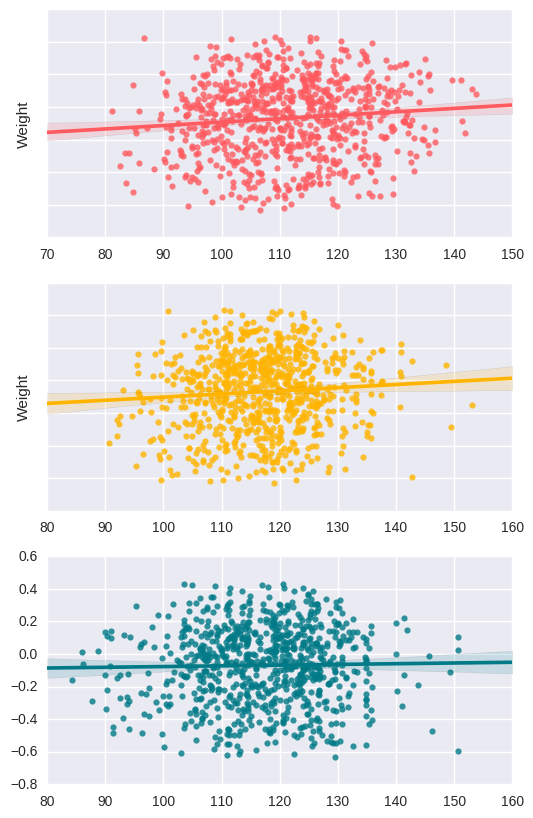

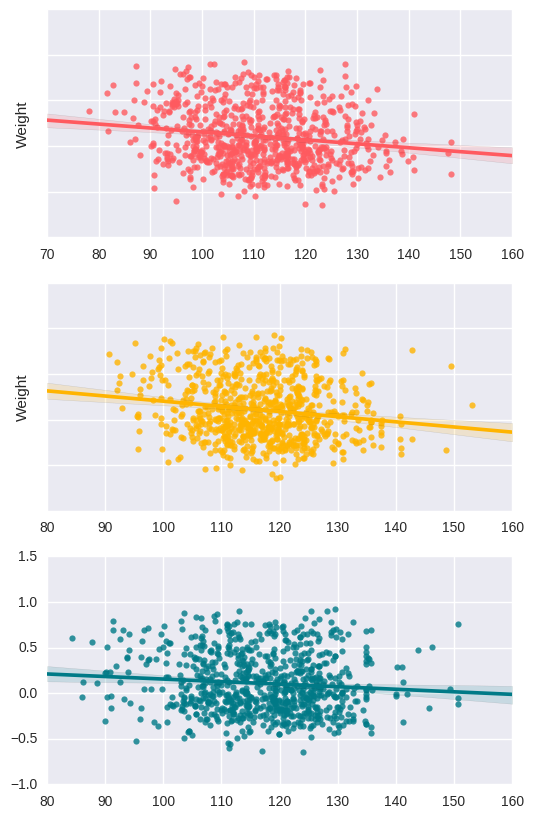

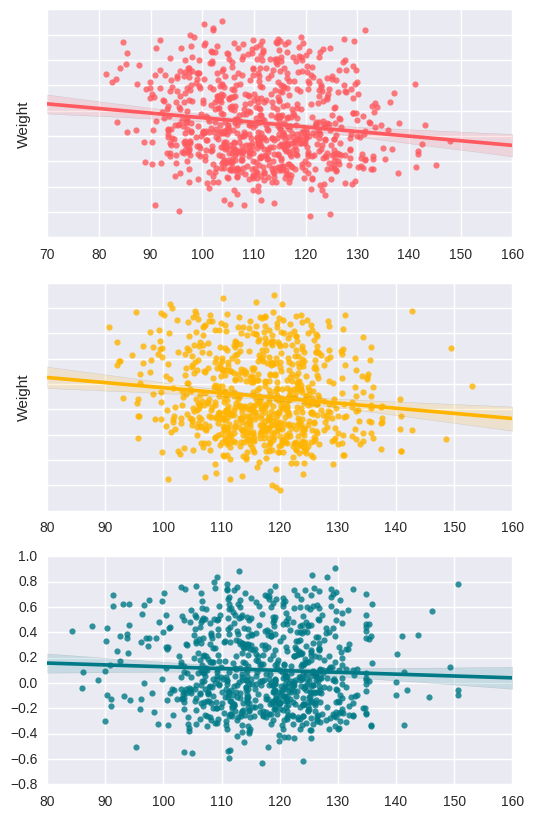

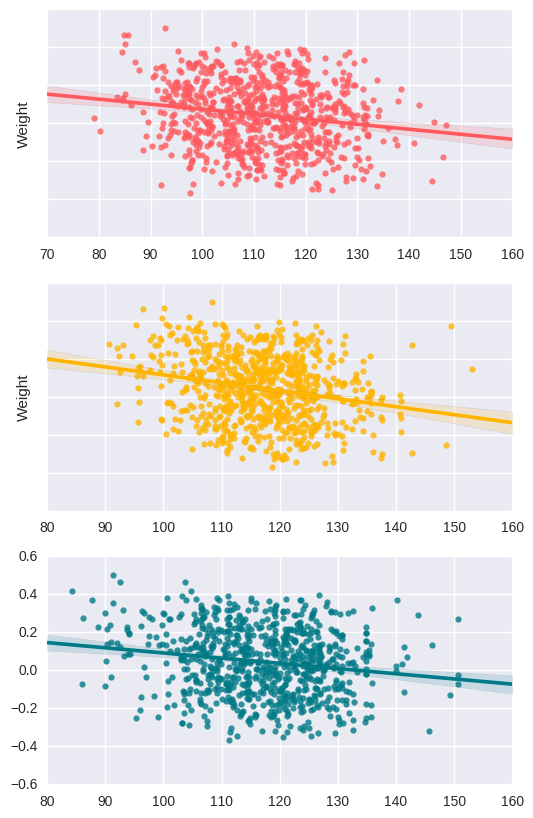

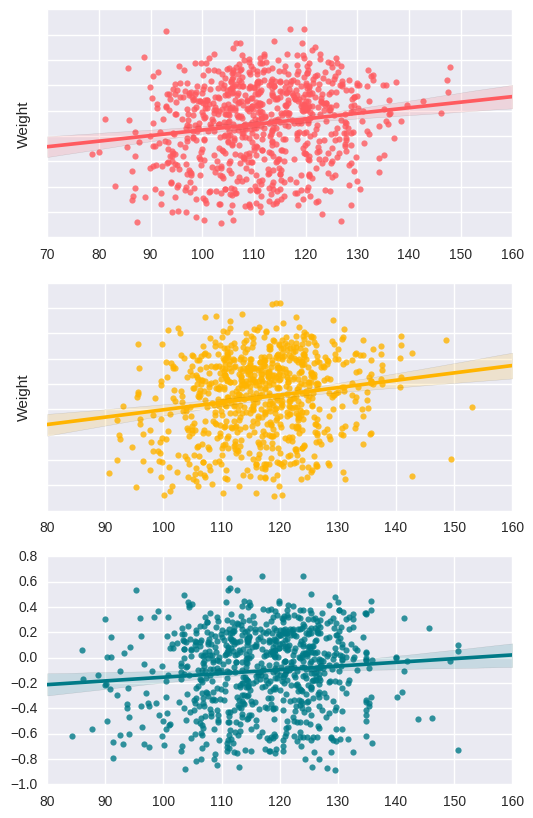

In [8]:
trial_list  = [ 'story']
subt_list = ['sub1','sub2','sub3','sub4','sub5']
for trial in trial_list :
    data = pd.read_csv(os.path.join(data_path,'{}_pheno_subtype.csv'.format(trial)))
    data_clean = data.dropna() # remove nan's
    for subt in subt_list :
    
        fig = plt.figure(figsize=(6,10))

        ax1 = fig.add_subplot(311)
        ax1 = sns.regplot(x="ListSort_Unadj", y=subt, data=data_math_clean,color="#ff5a5f",x_jitter= 4);
        ax1.set_ylabel('Weight')
        ax1.set_xlabel('')
        ax1.set(yticklabels=[])

        ax2 = fig.add_subplot(312)
        ax2= sns.regplot(x="PicVocab_Unadj", y=subt, data=data_math_clean,color="#ffb400");
        ax2.set_ylabel('Weight')
        ax2.set_xlabel('')
        ax2.set(yticklabels=[])

        ax3 = fig.add_subplot(313)
        ax3= sns.regplot(x="ReadEng_Unadj", y=subt, data=data_math_clean,color="#007a87");
        ax3.set_ylabel('')
        ax3.set_xlabel('')

        fig.savefig(os.path.join(data_path,"{}_pheno_association_{}.svg".format(trial,subt)))

In [ ]:
########################### Change kernel to R #############################

In [1]:
# first on terminal install cairo : "sudo apt install libcairo2-dev"
# devtools::install_github("hadley/svglite")
#devtools::install_github("ricardo-bion/ggradar", dependencies=TRUE)

In [1]:
library(ggradar)
suppressPackageStartupMessages(library(dplyr))
library(scales)
require("ggplot2")

Loading required package: ggplot2


In [2]:
MyData_story <- read.csv(file="/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_22-Feb-2017/associations/story_r2.csv")
sprintf('Story R-squared table:')
MyData_story

[1] "Story R-squared table:"

pheno,sub1,sub2,sub3,sub4,sub5
PicVocab_Unadj,0.03231455,0.06175884,0.05029133,0.08543423,0.06725602
ListSort_Unadj,0.03153520,0.04638032,0.04390459,0.04936827,0.04981514
ReadEng_Unadj,0.02307269,0.03706280,0.03211910,0.05614010,0.04048692


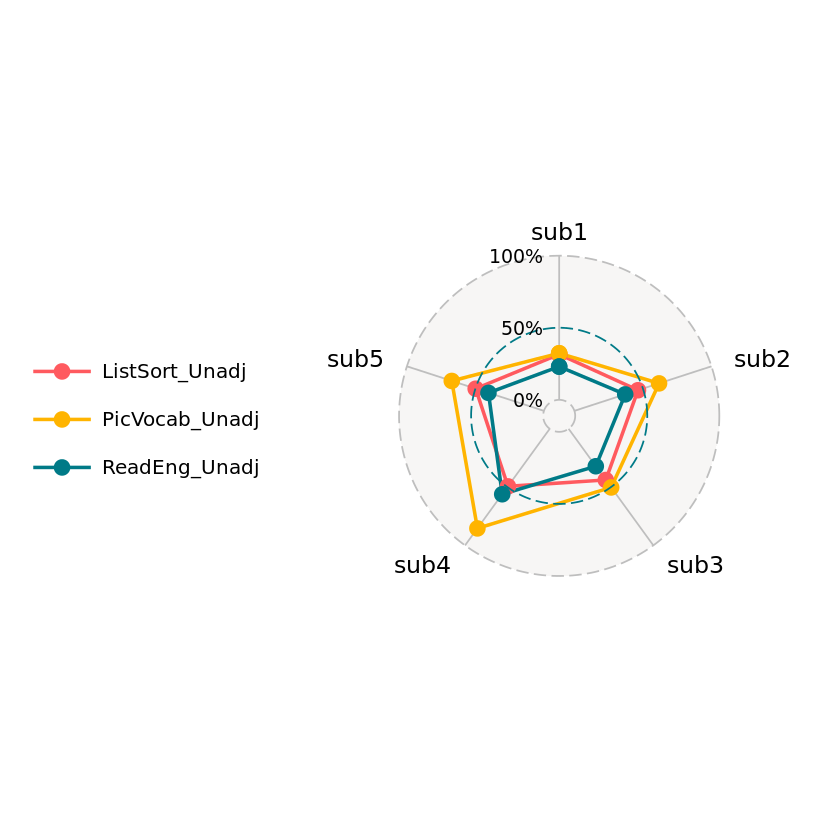

In [5]:
# plot R2 radar math
image_story=ggradar(MyData_story, grid.min = 0,
  grid.mid = 0.05, grid.max = 0.1, axis.label.size = 5, grid.label.size = 5 ,legend.text.size =5,
                    group.line.width = 1,group.point.size = 4) +
  theme(legend.text = element_text(size = 12))
image_story

In [16]:
setwd("/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_01-Feb-2017/associations/")
setwd("/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_01-Feb-2017/associations/")

In [17]:
ggsave(file="math_R-squared.svg", plot=image_math, width=10, height=8)
ggsave(file="story_R-squared.svg", plot=image_story, width=10, height=8)